In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [2]:
latitude = 40.220582
longitude = -74.759717
location_url = f"https://api.weather.gov/points/{latitude},{longitude}"

In [3]:
response = requests.get(location_url).json()
forecast_url = response['properties']['forecast']
forecast_url

'https://api.weather.gov/gridpoints/PHI/62,90/forecast'

In [4]:
forecast = requests.get(forecast_url).json()['properties']['periods']
df = pd.DataFrame(forecast).set_index("number")
df.head()

,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
number,,,,,,,,,,,,,,,
1,Tonight,2023-05-16T20:00:00-04:00,2023-05-17T06:00:00-04:00,False,55,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 11.66666...","{'unitCode': 'wmoUnit:percent', 'value': 60}",5 to 10 mph,W,https://api.weather.gov/icons/land/night/bkn?s...,Mostly Cloudy,"Mostly cloudy, with a low around 55. West wind..."
2,Wednesday,2023-05-17T06:00:00-04:00,2023-05-17T18:00:00-04:00,True,68,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 5.555555...","{'unitCode': 'wmoUnit:percent', 'value': 59}",10 to 15 mph,N,https://api.weather.gov/icons/land/day/few?siz...,Sunny,"Sunny, with a high near 68. North wind 10 to 1..."
3,Wednesday Night,2023-05-17T18:00:00-04:00,2023-05-18T06:00:00-04:00,False,39,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': -3.88888...","{'unitCode': 'wmoUnit:percent', 'value': 54}",5 to 10 mph,N,https://api.weather.gov/icons/land/night/skc?s...,Clear,"Clear, with a low around 39. North wind 5 to 1..."
4,Thursday,2023-05-18T06:00:00-04:00,2023-05-18T18:00:00-04:00,True,69,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 2.222222...","{'unitCode': 'wmoUnit:percent', 'value': 52}",5 mph,E,https://api.weather.gov/icons/land/day/skc?siz...,Sunny,"Sunny, with a high near 69. East wind around 5..."
5,Thursday Night,2023-05-18T18:00:00-04:00,2023-05-19T06:00:00-04:00,False,45,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 6.111111...","{'unitCode': 'wmoUnit:percent', 'value': 93}",5 to 10 mph,SE,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,"Mostly clear, with a low around 45. Southeast ..."


*   Get the Forecast for a given location in the US
*   Get the Temperature in F and C
*   Create a clean DataFrame to hold all the relevant data
*   Plot the temparature in both C and F, with lines for day and night
*   Make sure the the plots are correctly labeled



In [5]:
temperatures = df.copy()[["name", "temperature"]]
temperatures["Celsius"] = round((df["temperature"] - 32) * 5/9).astype(int)
temperatures = temperatures.rename(columns={"temperature":"Fahrenheit", "name": "Time"}).set_index("Time")
temperatures.head()

,Fahrenheit,Celsius
Time,,
Tonight,55,13
Wednesday,68,20
Wednesday Night,39,4
Thursday,69,21
Thursday Night,45,7


In [6]:
pd.to_datetime(df["startTime"])

number
1    2023-05-16 20:00:00-04:00
2    2023-05-17 06:00:00-04:00
3    2023-05-17 18:00:00-04:00
4    2023-05-18 06:00:00-04:00
5    2023-05-18 18:00:00-04:00
6    2023-05-19 06:00:00-04:00
7    2023-05-19 18:00:00-04:00
8    2023-05-20 06:00:00-04:00
9    2023-05-20 18:00:00-04:00
10   2023-05-21 06:00:00-04:00
11   2023-05-21 18:00:00-04:00
12   2023-05-22 06:00:00-04:00
13   2023-05-22 18:00:00-04:00
14   2023-05-23 06:00:00-04:00
Name: startTime, dtype: datetime64[ns, UTC-04:00]

In [7]:
day = df.copy().loc[df["isDaytime"] == True]
night = df.copy().loc[df["isDaytime"] == False]

In [8]:
day.head()

,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
number,,,,,,,,,,,,,,,
2,Wednesday,2023-05-17T06:00:00-04:00,2023-05-17T18:00:00-04:00,True,68,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 5.555555...","{'unitCode': 'wmoUnit:percent', 'value': 59}",10 to 15 mph,N,https://api.weather.gov/icons/land/day/few?siz...,Sunny,"Sunny, with a high near 68. North wind 10 to 1..."
4,Thursday,2023-05-18T06:00:00-04:00,2023-05-18T18:00:00-04:00,True,69,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 2.222222...","{'unitCode': 'wmoUnit:percent', 'value': 52}",5 mph,E,https://api.weather.gov/icons/land/day/skc?siz...,Sunny,"Sunny, with a high near 69. East wind around 5..."
6,Friday,2023-05-19T06:00:00-04:00,2023-05-19T18:00:00-04:00,True,73,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 7.777777...","{'unitCode': 'wmoUnit:percent', 'value': 89}",5 to 15 mph,SE,https://api.weather.gov/icons/land/day/sct?siz...,Mostly Sunny,"Mostly sunny, with a high near 73."
8,Saturday,2023-05-20T06:00:00-04:00,2023-05-20T18:00:00-04:00,True,73,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 40}","{'unitCode': 'wmoUnit:degC', 'value': 14.44444...","{'unitCode': 'wmoUnit:percent', 'value': 100}",5 to 10 mph,S,https://api.weather.gov/icons/land/day/rain_sh...,Chance Rain Showers,"A chance of rain showers. Mostly cloudy, with ..."
10,Sunday,2023-05-21T06:00:00-04:00,2023-05-21T18:00:00-04:00,True,78,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 12.77777...","{'unitCode': 'wmoUnit:percent', 'value': 96}",10 mph,W,https://api.weather.gov/icons/land/day/rain_sh...,Chance Rain Showers,A chance of rain showers before 2pm. Mostly su...


In [9]:
night.head()

,name,startTime,endTime,isDaytime,temperature,temperatureUnit,temperatureTrend,probabilityOfPrecipitation,dewpoint,relativeHumidity,windSpeed,windDirection,icon,shortForecast,detailedForecast
number,,,,,,,,,,,,,,,
1,Tonight,2023-05-16T20:00:00-04:00,2023-05-17T06:00:00-04:00,False,55,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 11.66666...","{'unitCode': 'wmoUnit:percent', 'value': 60}",5 to 10 mph,W,https://api.weather.gov/icons/land/night/bkn?s...,Mostly Cloudy,"Mostly cloudy, with a low around 55. West wind..."
3,Wednesday Night,2023-05-17T18:00:00-04:00,2023-05-18T06:00:00-04:00,False,39,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': -3.88888...","{'unitCode': 'wmoUnit:percent', 'value': 54}",5 to 10 mph,N,https://api.weather.gov/icons/land/night/skc?s...,Clear,"Clear, with a low around 39. North wind 5 to 1..."
5,Thursday Night,2023-05-18T18:00:00-04:00,2023-05-19T06:00:00-04:00,False,45,F,None,"{'unitCode': 'wmoUnit:percent', 'value': None}","{'unitCode': 'wmoUnit:degC', 'value': 6.111111...","{'unitCode': 'wmoUnit:percent', 'value': 93}",5 to 10 mph,SE,https://api.weather.gov/icons/land/night/few?s...,Mostly Clear,"Mostly clear, with a low around 45. Southeast ..."
7,Friday Night,2023-05-19T18:00:00-04:00,2023-05-20T06:00:00-04:00,False,52,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 30}","{'unitCode': 'wmoUnit:degC', 'value': 11.11111...","{'unitCode': 'wmoUnit:percent', 'value': 100}",5 to 15 mph,SE,https://api.weather.gov/icons/land/night/sct/r...,Partly Cloudy then Chance Rain Showers,A chance of rain showers after 2am. Partly clo...
9,Saturday Night,2023-05-20T18:00:00-04:00,2023-05-21T06:00:00-04:00,False,56,F,None,"{'unitCode': 'wmoUnit:percent', 'value': 40}","{'unitCode': 'wmoUnit:degC', 'value': 13.88888...","{'unitCode': 'wmoUnit:percent', 'value': 96}",10 mph,W,https://api.weather.gov/icons/land/night/rain_...,Chance Rain Showers,"A chance of rain showers. Mostly cloudy, with ..."


In [10]:
def extract_value(row):
  return row["value"]

df["dewpoint"].apply(extract_value)

number
1     11.666667
2      5.555556
3     -3.888889
4      2.222222
5      6.111111
6      7.777778
7     11.111111
8     14.444444
9     13.888889
10    12.777778
11    12.777778
12    11.666667
13    10.000000
14    10.000000
Name: dewpoint, dtype: float64

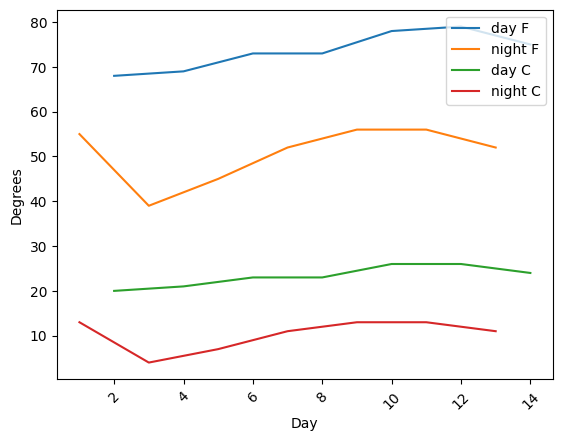

In [11]:
plt.plot(day["temperature"], label="day F")
plt.plot(night["temperature"], label="night F")

plt.plot(round((day["temperature"] - 32) * 5/9).astype(int), label="day C")
plt.plot(round((night["temperature"] - 32) * 5/9).astype(int), label="night C")

plt.xlabel('Day')
plt.ylabel('Degrees')

plt.xticks(rotation = 45)

plt.legend(loc="upper right")
plt.show()